# Predicting Housing Prices Using the Melbourne Housing Market Dataset
___
The [Melbourne Housing Market Dataset](https://www.kaggle.com/anthonypino/melbourne-housing-market) contains information on properties that have sold in Melbourne, Australia. It was scrapped from [Domain.com.au]() by Tony Pino, and uploaded onto Kaggle.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [157]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [158]:
df.shape

(52964, 12)

In [159]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52964 entries, 0 to 52963
Data columns (total 12 columns):
Suburb           52964 non-null object
Address          52964 non-null object
Rooms            52964 non-null int64
Type             52964 non-null object
Price            41196 non-null float64
Method           52964 non-null object
SellerG          52964 non-null object
Date             52964 non-null object
Regionname       52964 non-null object
Propertycount    52964 non-null int64
Distance         52964 non-null float64
CouncilArea      52964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [161]:
#Looks like there's some missing data
print(df.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price            11768
Method               0
SellerG              0
Date                 0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


In [162]:
# Drop rows that have missing prices, as imputing the dependent variable seems like a risky move. 
df = df.dropna(axis=0)

# Exploratory Data Analysis

In [163]:
df.describe()

,Rooms,Price,Propertycount,Distance
count,41196.000000,4.119600e+04,41196.000000,41196.000000
mean,3.077580,1.001993e+06,7559.457229,12.748318
std,0.948869,6.033969e+05,4442.485337,7.598925
min,1.000000,8.500000e+04,59.000000,0.000000
25%,2.000000,6.170000e+05,4280.000000,7.000000
50%,3.000000,8.350000e+05,6567.000000,11.700000
75%,4.000000,1.225000e+06,10412.000000,16.700000
max,31.000000,1.120000e+07,21650.000000,54.000000


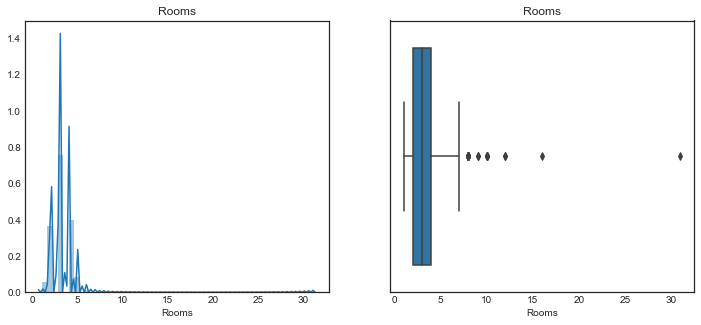

In [164]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Rooms'])
plt.title('Rooms')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rooms'])
plt.title('Rooms')

plt.show()

In [165]:
#Remove outliers of any number of rooms over 8
df = df[df['Rooms'] < 8 ]

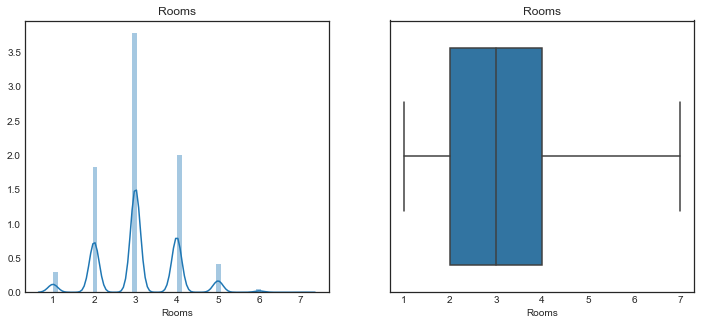

In [166]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Rooms'])
plt.title('Rooms')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rooms'])
plt.title('Rooms')

plt.show()

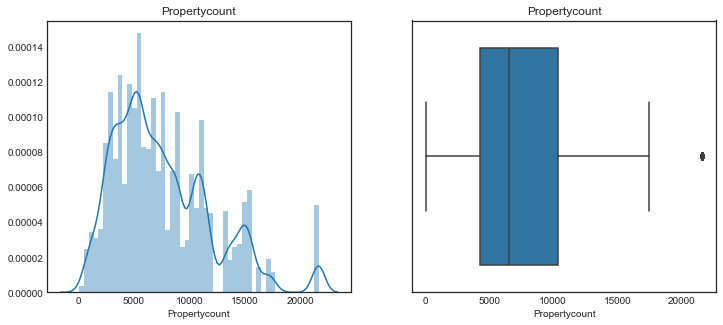

In [167]:
#Number of Properties in the area
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Propertycount'])
plt.title('Propertycount')

plt.subplot(1, 2, 2)
sns.boxplot(df['Propertycount'])
plt.title('Propertycount')

plt.show()

In [168]:
#Remove outliers of propertycount over 20000
df = df[df['Propertycount'] < 20000 ]

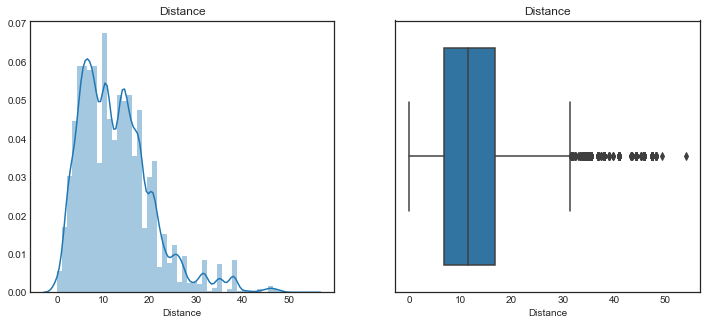

In [169]:
#Distance to the CBD aka Melbourne City Centre
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Distance'])
plt.title('Distance')

plt.subplot(1, 2, 2)
sns.boxplot(df['Distance'])
plt.title('Distance')

plt.show()

In [170]:
#remove outliers of distance over 30
df = df[df['Distance'] < 30 ]

In [171]:
df.Suburb.value_counts()

Bentleigh East       587
Richmond             534
Preston              492
Mount Waverley       475
Craigieburn          474
Brunswick            464
Cheltenham           441
Northcote            419
Glenroy              416
Glen Waverley        413
Essendon             412
Mill Park            388
South Yarra          379
Coburg               377
Bundoora             374
Pascoe Vale          369
Kew                  366
Hawthorn             365
Glen Iris            362
Epping               356
Brighton             355
Balwyn North         352
St Kilda             351
Doncaster East       334
Camberwell           333
Hoppers Crossing     332
Thornbury            320
Bentleigh            318
Brighton East        313
Port Melbourne       310
                    ... 
Warranwood            10
The Basin             10
Laverton               9
Plenty                 9
North Warrandyte       9
Eumemmerring           8
Diggers Rest           8
Seabrook               7
Wattle Glen            7


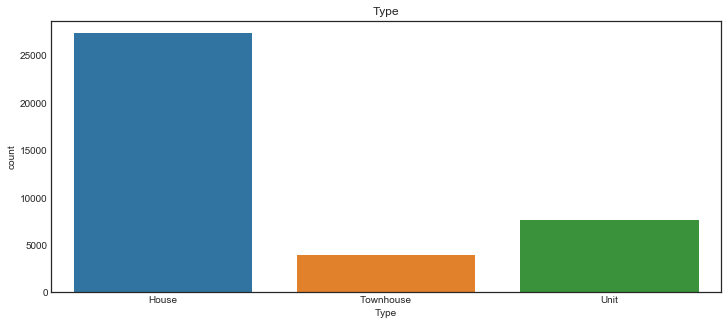

In [172]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type", data=df);
plt.xticks(np.arange(3),('House', 'Townhouse', 'Unit'))
plt.title('Type')


plt.show()

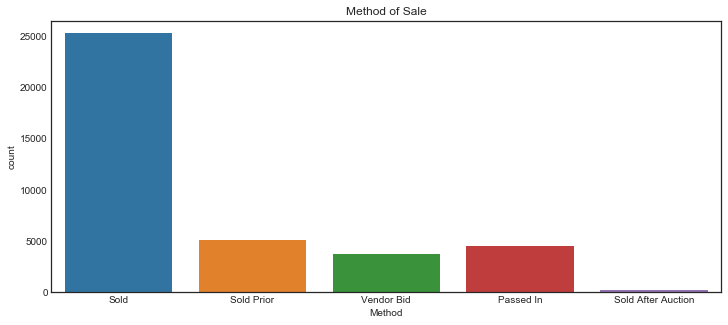

In [173]:
plt.figure(figsize=(12,5))
sns.countplot(x="Method", data=df);
plt.xticks(np.arange(5),('Sold', 'Sold Prior', 'Vendor Bid', 'Passed In', 'Sold After Auction'))
plt.title('Method of Sale')


plt.show()

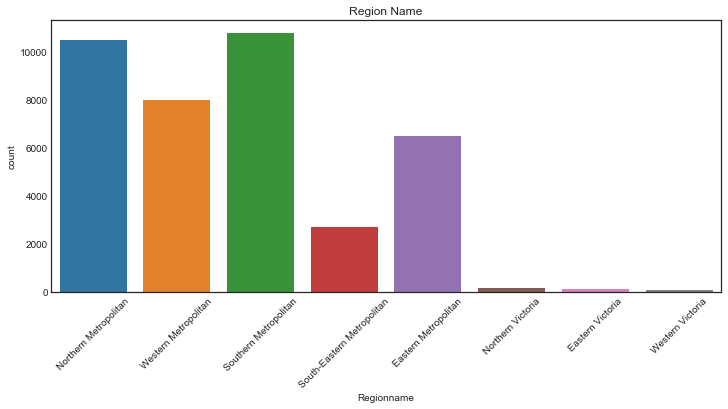

In [174]:
plt.figure(figsize=(12,5))
sns.countplot(x="Regionname", data=df);
plt.xticks(rotation=45)
plt.title('Region Name')


plt.show()

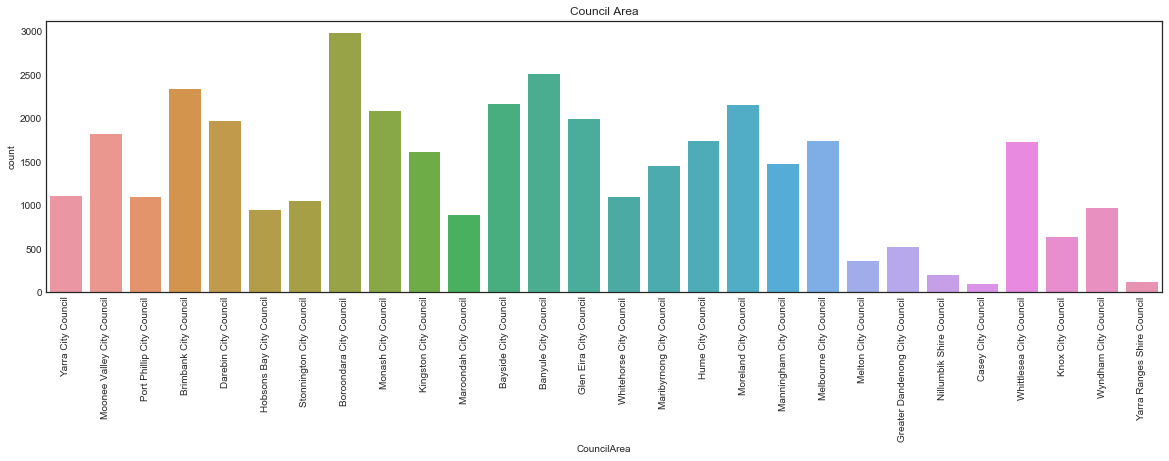

In [175]:
plt.figure(figsize=(20,5))
sns.countplot(x="CouncilArea", data=df);
plt.xticks(rotation=90)
plt.title('Council Area')


plt.show()

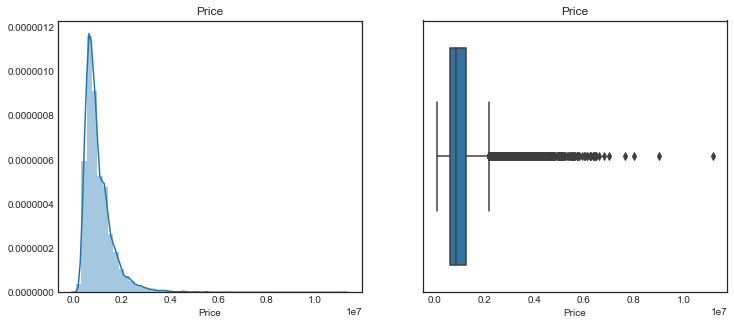

In [176]:
# Explore the distribution of the dependent variable
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.title('Price')

plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])
plt.title('Price')

plt.show()

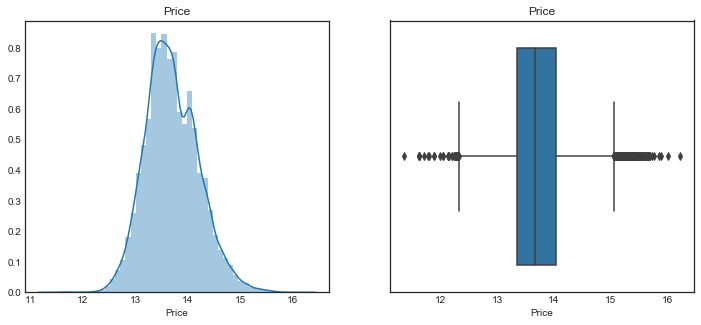

In [177]:
#The dependent variable is not normally distributed. Let's try a log transform to normalize it.
df['Price'] = np.log(df['Price'])

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.title('Price')

plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])
plt.title('Price')

plt.show()

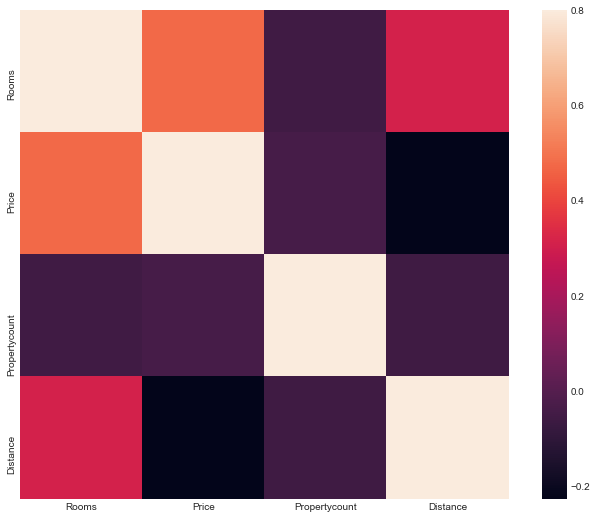

In [178]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Feature Engineering and Selection

In [179]:
# Convert date to datetime object
df['Date'] = pd.to_datetime(df['Date'])
len(df['Date'].unique())

91

In [180]:
# Convert date to ordinal
df['Date'] = [x.toordinal() for x in df['Date']]

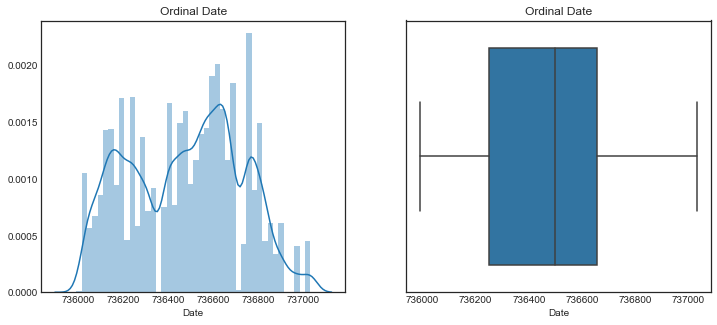

In [181]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Date'])
plt.title('Ordinal Date')

plt.subplot(1, 2, 2)
sns.boxplot(df['Date'])
plt.title('Ordinal Date')

plt.show()

In [182]:
#Create dummies for Suburb
df = pd.get_dummies(data=df, columns=['Suburb', 'Type', 'Method', 'Regionname', 'CouncilArea'])
X = df.drop(['Address', 'Price', 'SellerG'], axis=1)

In [183]:
y = df['Price'].values.reshape(-1, 1)

# Fit and Tune Model
I will use lasso regression due to its interpretability and feature selection

In [184]:
alphas=[0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,1]


mx_lambda = []
for i in alphas:
    lass = linear_model.Lasso(alpha=i)
    lass.fit(X, y)
    score = cross_val_score(lass, X, y, cv=10)
    mean_score = score.mean()
    spread = score.max() - score.min()
    mx_lambda.append([i, mean_score, spread])

mx_lambda = pd.DataFrame(mx_lambda)
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']

Text(0.5,1,'spread')

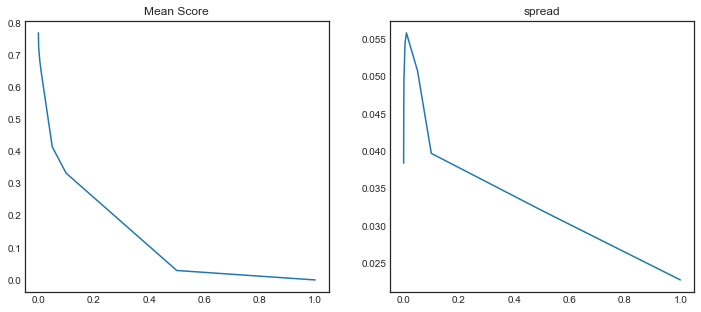

In [185]:
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(mx_lambda.n_lambda, mx_lambda.mean_score)
plt.title('Mean Score')

plt.subplot(1, 2, 2)
plt.plot(mx_lambda.n_lambda, mx_lambda.spread)
plt.title('spread')

In [186]:
mx_lambda

,n_lambda,mean_score,spread
0,0.000001,0.767249,0.038343
1,0.000010,0.767264,0.038443
2,0.000100,0.764327,0.040505
3,0.000500,0.739863,0.046240
4,0.001000,0.721678,0.049442
5,0.005000,0.680455,0.054364
6,0.010000,0.646418,0.055790
7,0.050000,0.412887,0.050730
8,0.100000,0.330996,0.039664
9,0.500000,0.028086,0.032014


In [187]:
lass = linear_model.Lasso(alpha=0.000010)
lass.fit(X, y)
cross_val_score(lass, X, y, cv=10)

array([0.77130374, 0.7444894 , 0.75364739, 0.78293225, 0.7651067 ,
       0.78050863, 0.77442377, 0.76631003, 0.75977296, 0.7741462 ])

In [188]:
#Tuning the normalize parameter
lass = linear_model.Lasso(alpha=0.000010, normalize=True)
lass.fit(X, y)
cross_val_score(lass, X, y, cv=10)

array([0.76793606, 0.74161741, 0.7533937 , 0.77944479, 0.76328556,
       0.7779508 , 0.77165744, 0.764572  , 0.75595047, 0.7715525 ])

In [189]:
lass = linear_model.Lasso(alpha=0.000010)
lass.fit(X, y)
print(lass.coef_)

[ 2.14646525e-01  2.13356209e-04 -1.34069047e-06 -2.91741088e-02
 -1.82536869e-02  2.15061386e-01 -8.52746728e-02 -1.92920348e-01
  3.21034420e-01  4.04179574e-02  2.25671018e-01  1.27067294e-01
 -2.25974894e-01 -1.13525342e-01 -6.91380179e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.92880920e-02  1.71970421e-01
 -1.23028944e-02  5.56610084e-02 -1.50548240e-01 -8.40290152e-02
  6.67678288e-02  4.65127728e-03  5.15062670e-02 -6.94757499e-02
  7.84656986e-02 -1.47729919e-01  8.76893391e-02  5.85159807e-02
  2.25963223e-01  1.80731680e-01 -1.07620998e-02 -0.00000000e+00
  2.57643098e-01  0.00000000e+00  1.45152403e-01 -1.01313223e-01
 -1.94432777e-02  2.65458013e-01 -4.01039640e-03 -1.48679381e-01
 -0.00000000e+00  3.48565712e-02  9.62876992e-02  7.06080109e-02
 -5.09664710e-02  1.62629658e-02 -1.06922159e-01 -1.31300624e-01
 -5.71414500e-03 -0.00000000e+00 -1.91922808e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.65988189e-02 -9.87053825e-02
  2.23725406e-01  8.78685

In [118]:
# Not as interpretable as I had hoped, let's try RFE
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
#selector = RFE(lass)
#selector = selector.fit(X, y)
#rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
#rankings.sort_values('Ranking')

In [190]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': lass.coef_})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)

In [149]:
#for row in feature_rank.iterrows():
#    print(row)

In [191]:
feature_rank.head(50)

,features,coefficients,absolute_coef
0,Suburb_Yan Yean,0.587692,0.587692
1,Suburb_Oaklands Junction,0.457983,0.457983
2,Suburb_Ivanhoe East,0.455307,0.455307
3,Suburb_Eaglemont,0.391744,0.391744
4,Type_h,0.370250,0.370250
5,Suburb_Middle Park,0.361890,0.361890
6,Suburb_East Melbourne,0.352927,0.352927
7,Suburb_Chelsea,0.347413,0.347413
8,Suburb_Parkdale,0.346458,0.346458
9,Suburb_Edithvale,0.337757,0.337757


In [192]:
feature_rank.tail(50)

,features,coefficients,absolute_coef
299,Suburb_Ferny Creek,0.0,0.0
300,Suburb_Wattle Glen,0.0,0.0
301,Suburb_Gladstone Park,0.0,0.0
302,Suburb_Hillside,-0.0,0.0
303,Suburb_Eynesbury,0.0,0.0
304,Suburb_Hoppers Crossing,-0.0,0.0
305,Suburb_Hurstbridge,-0.0,0.0
306,CouncilArea_Darebin City Council,-0.0,0.0
307,Suburb_Blackburn South,-0.0,0.0
308,Suburb_Keilor Downs,0.0,0.0


# Trying it without all the suburb dummies

In [195]:
df2 = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df2 = df2.dropna(axis=0)
df2 = df2[df2['Rooms'] < 8 ]
df2 = df2[df2['Propertycount'] < 20000 ]
df2 = df2[df2['Distance'] < 30 ]
df2['Price'] = np.log(df2['Price'])
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = [x.toordinal() for x in df2['Date']]
df2 = pd.get_dummies(data=df2, columns=['Type', 'Method', 'Regionname', 'CouncilArea'])
X2 = df2.drop(['Address', 'Price', 'SellerG', 'Suburb'], axis=1)
y2 = df['Price'].values.reshape(-1, 1)

In [196]:
alphas=[0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,1]


mx_lambda = []
for i in alphas:
    lass = linear_model.Lasso(alpha=i)
    lass.fit(X2, y2)
    score = cross_val_score(lass, X2, y2, cv=10)
    mean_score = score.mean()
    spread = score.max() - score.min()
    mx_lambda.append([i, mean_score, spread])

mx_lambda = pd.DataFrame(mx_lambda)
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']

Text(0.5,1,'spread')

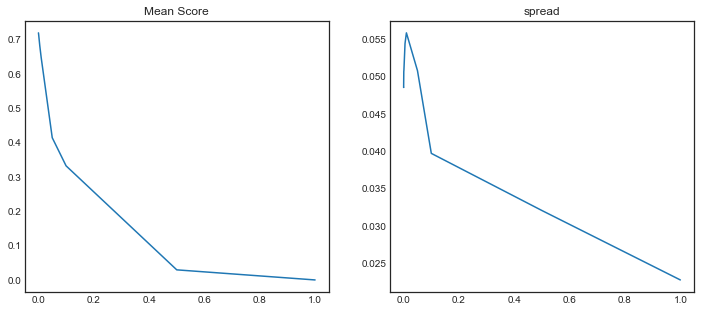

In [197]:
mx_lambda.columns = ['n_lambda', 'mean_score', 'spread']
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(mx_lambda.n_lambda, mx_lambda.mean_score)
plt.title('Mean Score')

plt.subplot(1, 2, 2)
plt.plot(mx_lambda.n_lambda, mx_lambda.spread)
plt.title('spread')

In [199]:
mx_lambda

,n_lambda,mean_score,spread
0,0.000001,0.718326,0.048506
1,0.000010,0.718315,0.048482
2,0.000100,0.718167,0.048925
3,0.000500,0.715770,0.050595
4,0.001000,0.712361,0.050826
5,0.005000,0.680455,0.054364
6,0.010000,0.646418,0.055790
7,0.050000,0.412887,0.050730
8,0.100000,0.330996,0.039664
9,0.500000,0.028086,0.032014


In [200]:
#Tuning the normalize parameter
lass = linear_model.Lasso(alpha=0.000010, normalize=False)
lass.fit(X2, y2)
cross_val_score(lass, X2, y2, cv=10)

array([0.71983666, 0.68926043, 0.70633834, 0.73774269, 0.71477413,
       0.73540917, 0.72583725, 0.71824992, 0.70846795, 0.72723655])

# Conclusion

Based on the table of features, the best predictor of house value is location. And that was futher illustrated when the model was tried without the suburb features. 